# Regresión lineal matricial | Geordie Quiroa

In [320]:
from typing import List, Callable, Any # para docstrings y typing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lectura y concatenación de archivos

In [261]:
df = pd.read_csv('./la.csv')
df.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [262]:
df1 = pd.read_csv('./ny.csv')
df1.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150,170,150,170,MICHIGAN,NaN,xlge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150,170,150,170,MICHIGAN,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,130,150,130,150,NEW JERSEY,NaN,xlge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,130,150,130,150,NEW JERSEY,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120,140,120,140,NEW YORK,NaN,med-lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [805]:
#!pip freeze >> requirements.txt
pd.set_option('display.max.columns', None) # indico que se muestren todas las columnas
pd.set_option('display.precision',2) # establezco 2 decimales de precisión.

In [264]:
df.columns == df1.columns # verifico que tengan las mismas columnas para concatenar las filas

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [265]:
df = pd.concat([df,df1], sort = False)
df.sample(10)

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
60,PUMPKINS,NEW YORK,NaN,24 inch bins,PIE TYPE,NaN,NaN,09/16/2017,120.0,150.0,120.0,150.0,NEW JERSEY,NaN,lge,ORANGE,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
20,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,10/15/2016,160.0,160.0,160.0,160.0,NEW YORK,ORANGE COUNTY NEW YORK,xlge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
91,PUMPKINS,NEW YORK,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,10/15/2016,15.0,18.0,15.0,18.0,OHIO,NaN,sml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
110,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/15/2016,18.0,18.0,18.0,18.0,NEW YORK,WESTERN SECTION,med,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
50,PUMPKINS,LOS ANGELES,NaN,each,BIG MACK TYPE,NaN,NaN,10/15/2016,250.0,250.0,250.0,250.0,CALIFORNIA,NaN,lge,NaN,NaN,EACH,NaN,NaN,NaN,NaN,NaN,N,NaN
50,PUMPKINS,NEW YORK,NaN,24 inch bins,PIE TYPE,NaN,NaN,10/08/2016,180.0,200.0,180.0,200.0,OHIO,NaN,med,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
75,PUMPKINS,NEW YORK,NaN,36 inch bins,PIE TYPE,NaN,NaN,09/23/2017,200.0,200.0,200.0,200.0,PENNSYLVANIA,NaN,lge,ORANGE,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
85,PUMPKINS,NEW YORK,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,09/24/2016,15.0,18.0,15.0,18.0,OHIO,NaN,sml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
23,PUMPKINS,LOS ANGELES,NaN,36 inch bins,HOWDEN WHITE TYPE,NaN,NaN,09/23/2017,0.5,0.5,0.5,0.5,CALIFORNIA,CENTRAL SAN JOAQUIN VALLEY CALIFORNIA,med,NaN,NaN,PER LB,NaN,NaN,NaN,NaN,NaN,N,NaN
19,PUMPKINS,LOS ANGELES,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/30/2017,275.0,375.0,275.0,375.0,CALIFORNIA,CENTRAL SAN JOAQUIN VALLEY CALIFORNIA,sml,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


# Exploración de los datos

In [266]:
df.describe() # descripicon estadistica de los datos

,Type,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode
count,0.0,0.0,174.00,174.00,174.00,174.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,97.29,105.39,97.41,105.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,79.88,85.80,79.89,85.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.24,0.24,0.24,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,18.00,18.00,18.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,120.00,130.00,120.00,130.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,150.00,160.00,150.00,160.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,275.00,375.00,275.00,375.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
df.describe(include=np.object)

,Commodity Name,City Name,Package,Variety,Sub Variety,Date,Origin,Origin District,Item Size,Color,Unit of Sale,Repack
count,174,174,174,174,24,174,174,46,150,31,78,174
unique,1,2,9,9,2,14,6,3,6,2,3,1
top,PUMPKINS,NEW YORK,36 inch bins,HOWDEN TYPE,FLAT TYPE,10/08/2016,CALIFORNIA,CENTRAL SAN JOAQUIN VALLEY CALIFORNIA,lge,ORANGE,PER BIN,N
freq,174,112,68,60,20,24,62,31,42,18,49,174


In [268]:
df.info() # conteo de valores no nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 111
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Commodity Name   174 non-null    object 
 1   City Name        174 non-null    object 
 2   Type             0 non-null      float64
 3   Package          174 non-null    object 
 4   Variety          174 non-null    object 
 5   Sub Variety      24 non-null     object 
 6   Grade            0 non-null      float64
 7   Date             174 non-null    object 
 8   Low Price        174 non-null    float64
 9   High Price       174 non-null    float64
 10  Mostly Low       174 non-null    float64
 11  Mostly High      174 non-null    float64
 12  Origin           174 non-null    object 
 13  Origin District  46 non-null     object 
 14  Item Size        150 non-null    object 
 15  Color            31 non-null     object 
 16  Environment      0 non-null      float64
 17  Unit of Sale    

In [269]:
df.shape # n filas, n columnas

(174, 25)

In [270]:
# elimino todas las variables que son completamente nulas.
df.drop([
    'Type',
    'Grade',
    'Environment',
    'Quality',
    'Condition',
    'Appearance',
    'Crop',
    'Storage',
    'Trans Mode'
], inplace=True, axis=1)

In [271]:
df.describe()

,Low Price,High Price,Mostly Low,Mostly High
count,174.00,174.00,174.00,174.00
mean,97.29,105.39,97.41,105.34
std,79.88,85.80,79.89,85.84
min,0.24,0.24,0.24,0.24
25%,18.00,18.00,18.00,18.00
50%,120.00,130.00,120.00,130.00
75%,150.00,160.00,150.00,160.00
max,275.00,375.00,275.00,375.00


In [272]:
df.sample(10)

,Commodity Name,City Name,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack
17,PUMPKINS,NEW YORK,36 inch bins,HOWDEN TYPE,NaN,10/08/2016,160.00,160.00,160.00,160.00,NEW YORK,ORANGE COUNTY NEW YORK,xlge,NaN,NaN,N
63,PUMPKINS,NEW YORK,24 inch bins,PIE TYPE,NaN,09/23/2017,140.00,140.00,140.00,140.00,PENNSYLVANIA,NaN,lge,ORANGE,PER BIN,N
85,PUMPKINS,NEW YORK,1/2 bushel cartons,MINIATURE,FLAT TYPE,09/24/2016,15.00,18.00,15.00,18.00,OHIO,NaN,sml,NaN,NaN,N
0,PUMPKINS,NEW YORK,36 inch bins,HOWDEN TYPE,NaN,09/24/2016,150.00,170.00,150.00,170.00,MICHIGAN,NaN,xlge,NaN,NaN,N
14,PUMPKINS,NEW YORK,36 inch bins,HOWDEN TYPE,NaN,10/08/2016,160.00,180.00,160.00,180.00,MICHIGAN,NaN,xlge,NaN,NaN,N
78,PUMPKINS,NEW YORK,bushel cartons,PIE TYPE,NaN,09/16/2017,18.00,20.00,18.00,18.00,OHIO,NaN,NaN,NaN,NaN,N
61,PUMPKINS,LOS ANGELES,35 lb cartons,MINIATURE,FLAT TYPE,09/30/2017,24.50,24.50,24.50,24.50,CALIFORNIA,CENTRAL SAN JOAQUIN VALLEY CALIFORNIA,NaN,WHITE,NaN,N
58,PUMPKINS,NEW YORK,24 inch bins,PIE TYPE,NaN,09/16/2017,135.00,140.00,135.00,140.00,NEW JERSEY,NaN,NaN,ORANGE,PER BIN,N
98,PUMPKINS,NEW YORK,1/2 bushel cartons,MINIATURE,FLAT TYPE,11/05/2016,18.00,18.00,18.00,18.00,OHIO,NaN,sml,WHITE,NaN,N
39,PUMPKINS,LOS ANGELES,24 inch bins,FAIRYTALE,NaN,10/22/2016,0.24,0.24,0.24,0.24,CALIFORNIA,NaN,NaN,NaN,PER LB,N


In [273]:
df['Item Size'].unique()

array(['lge', 'med', 'med-lge', 'sml', nan, 'xlge', 'exjbo'], dtype=object)

In [274]:
df.groupby('Item Size')['High Price'].value_counts() # el objetivo es encontrar patrones en el precio para cada tamano.
# No parecen haber patrones, la varianza de los precios para cada tamano es alta.

Item Size  High Price
exjbo      80.00          2
lge        150.00         7
           130.00         6
           140.00         6
           250.00         5
           170.00         4
           180.00         3
           120.00         2
           200.00         2
           225.00         2
           90.00          1
           125.00         1
           160.00         1
           175.00         1
           265.00         1
med        18.00         10
           130.00         6
           0.50           4
           250.00         3
           260.00         3
           200.00         2
           90.00          1
           150.00         1
           190.00         1
           235.00         1
           300.00         1
med-lge    0.30           8
           130.00         6
           140.00         3
           180.00         1
sml        18.00         13
           20.00          6
           0.55           5
           16.00          2
           24.00          

# Inspección de datos faltantes


In [437]:
features_interes: List[str] = [
    'Package',
    'Variety',
    #'Sub Variety', # no es util para entender los datos debido a que es la misma sub variedad dada una variedad en especif.
    'High Price',
    #'Unit of Sale', # ya no es util porque esta feature se deriva del feature package
    'Item Size'
]

In [276]:
df[df['Item Size'].isnull()][features_interes] # visualizacion de los item size nulos

,Package,Variety,High Price,Item Size
35,24 inch bins,FAIRYTALE,0.24,NaN
36,24 inch bins,FAIRYTALE,0.24,NaN
37,24 inch bins,FAIRYTALE,0.24,NaN
38,24 inch bins,FAIRYTALE,0.24,NaN
39,24 inch bins,FAIRYTALE,0.24,NaN
40,24 inch bins,FAIRYTALE,0.24,NaN
42,35 lb cartons,PIE TYPE,30.00,NaN
43,35 lb cartons,PIE TYPE,30.00,NaN
44,35 lb cartons,PIE TYPE,30.00,NaN
45,36 inch bins,BIG MACK TYPE,0.85,NaN


# Criterios para realizar imputaciones en la variable independiente Item Size

La estrategia a desarrollar consiste en imputar un valor para Item Size, tomando en cuenta las calabazas que tienen precios similares al de la observación con na. Definiendo como criterio de homogeneidad: el Package, Variety y/o High Price. 

Posteriormente se compararán los resultados para el dataset con imputaciones, y el dataset sin las mismas, para ver cómo estas alteracines estarían afectando el modelo. 

In [277]:
df[df['Variety']=='FAIRYTALE'][features_interes] # ninguna FAIRYTALE, dado el Package 24 inch bins, tiene un item size.

,Package,Variety,High Price,Item Size
35,24 inch bins,FAIRYTALE,0.24,NaN
36,24 inch bins,FAIRYTALE,0.24,NaN
37,24 inch bins,FAIRYTALE,0.24,NaN
38,24 inch bins,FAIRYTALE,0.24,NaN
39,24 inch bins,FAIRYTALE,0.24,NaN
40,24 inch bins,FAIRYTALE,0.24,NaN
41,36 inch bins,FAIRYTALE,250.00,med


In [278]:
df[df['Package']=='24 inch bins'][features_interes] # los precios varían para este Package, pero para el precio 0.24
# no existe ninguna otra observacion. El siguiente precio más cercano para ese Package es de 0.30 con Item Size de med-large
# Se le colocara un item size a fairytale de med-lge.

,Package,Variety,High Price,Item Size
0,24 inch bins,HOWDEN TYPE,130.00,lge
1,24 inch bins,HOWDEN TYPE,130.00,med
2,24 inch bins,HOWDEN TYPE,130.00,lge
3,24 inch bins,HOWDEN TYPE,130.00,med
4,24 inch bins,HOWDEN TYPE,130.00,lge
5,24 inch bins,HOWDEN TYPE,130.00,med
6,24 inch bins,HOWDEN TYPE,130.00,lge
7,24 inch bins,HOWDEN TYPE,130.00,med
8,24 inch bins,HOWDEN TYPE,130.00,lge
9,24 inch bins,HOWDEN TYPE,130.00,med


In [279]:
# A las filas de calabazas cuya Variedad es Fairytale dentro de su Variedad
# no existe ningun valor histórico para su Item Size, por lo que imputarle un nuevo tamaño
# podría afectar/sesgar el modelo predictivo. 
# Pero no existe otra calabaza con el precio de Fairytale 0.24
# por lo que este nuevo tamaño estará correlacionado con el precio de 0.24.
# Precio bajo = tamano pequeno, y la Variety de fairytale se considerara mas adelante como pequena.
df.loc[(df['Variety']== 'FAIRYTALE')
       & (df['Item Size'].isnull()), 'Item Size'] = 'med-lge'

In [280]:
df.loc[df['High Price']==0.24]

,Commodity Name,City Name,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack
35,PUMPKINS,LOS ANGELES,24 inch bins,FAIRYTALE,NaN,09/24/2016,0.24,0.24,0.24,0.24,CALIFORNIA,NaN,med-lge,NaN,PER LB,N
36,PUMPKINS,LOS ANGELES,24 inch bins,FAIRYTALE,NaN,10/01/2016,0.24,0.24,0.24,0.24,CALIFORNIA,NaN,med-lge,NaN,PER LB,N
37,PUMPKINS,LOS ANGELES,24 inch bins,FAIRYTALE,NaN,10/08/2016,0.24,0.24,0.24,0.24,CALIFORNIA,NaN,med-lge,NaN,PER LB,N
38,PUMPKINS,LOS ANGELES,24 inch bins,FAIRYTALE,NaN,10/15/2016,0.24,0.24,0.24,0.24,CALIFORNIA,NaN,med-lge,NaN,PER LB,N
39,PUMPKINS,LOS ANGELES,24 inch bins,FAIRYTALE,NaN,10/22/2016,0.24,0.24,0.24,0.24,CALIFORNIA,NaN,med-lge,NaN,PER LB,N
40,PUMPKINS,LOS ANGELES,24 inch bins,FAIRYTALE,NaN,10/29/2016,0.24,0.24,0.24,0.24,CALIFORNIA,NaN,med-lge,NaN,PER LB,N


In [281]:
# para el siguiente valor en la lista de nulos -> 35 lb cartons, PIE TYPE 
df[df['Package']=='35 lb cartons'][features_interes] # ningun Package de 35 lb, tiene un Item Size.

,Package,Variety,High Price,Item Size
42,35 lb cartons,PIE TYPE,30.0,NaN
43,35 lb cartons,PIE TYPE,30.0,NaN
44,35 lb cartons,PIE TYPE,30.0,NaN
56,35 lb cartons,MINIATURE,24.5,NaN
57,35 lb cartons,MINIATURE,24.5,NaN
58,35 lb cartons,MINIATURE,24.5,NaN
59,35 lb cartons,MINIATURE,24.5,NaN
60,35 lb cartons,MINIATURE,24.5,NaN
61,35 lb cartons,MINIATURE,24.5,NaN


In [282]:
df[df['Variety']=='PIE TYPE'][features_interes] 
# El Item Size para el precio mas cercano a 30 (que es 18.0) de Variedad PIE TYPE es med.

,Package,Variety,High Price,Item Size
42,35 lb cartons,PIE TYPE,30.0,NaN
43,35 lb cartons,PIE TYPE,30.0,NaN
44,35 lb cartons,PIE TYPE,30.0,NaN
39,1 1/9 bushel cartons,PIE TYPE,18.0,med
40,1 1/9 bushel cartons,PIE TYPE,18.0,med
41,1 1/9 bushel cartons,PIE TYPE,18.0,med
42,1 1/9 bushel cartons,PIE TYPE,18.0,med
43,1 1/9 bushel cartons,PIE TYPE,18.0,med
44,1 1/9 bushel cartons,PIE TYPE,18.0,med
45,1 1/9 bushel cartons,PIE TYPE,18.0,med


In [283]:
# Se imputa med por el Item Size del PIE TYPE con precio mas cercano a 30, que es 18.
df.loc[(df['Variety']== 'PIE TYPE')
       & (df['Item Size'].isnull())
       & (df['High Price'] == 30.0), 'Item Size'] = 'med'

In [284]:
# para el siguiente valor en la lista de nulos -> 36 inch bins, Big Mack Type 
df[df['Package']=='36 inch bins'][features_interes] # ningun Package de 35 lb, tiene un Item Size.

,Package,Variety,High Price,Item Size
14,36 inch bins,HOWDEN TYPE,120.0,lge
15,36 inch bins,HOWDEN TYPE,120.0,lge
16,36 inch bins,HOWDEN TYPE,125.0,lge
17,36 inch bins,HOWDEN TYPE,180.0,med-lge
18,36 inch bins,HOWDEN TYPE,235.0,med
...,...,...,...,...
73,36 inch bins,PIE TYPE,260.0,med
74,36 inch bins,PIE TYPE,200.0,lge
75,36 inch bins,PIE TYPE,200.0,lge
76,36 inch bins,PIE TYPE,265.0,lge


In [285]:
df[df['Variety']=='BIG MACK TYPE'][features_interes] # El Item Size para el precio mas cercano a 0.85, es sml para BIG MACK TYPE

,Package,Variety,High Price,Item Size
45,36 inch bins,BIG MACK TYPE,0.85,NaN
46,each,BIG MACK TYPE,250.00,lge
47,each,BIG MACK TYPE,0.55,sml
48,each,BIG MACK TYPE,250.00,lge
49,each,BIG MACK TYPE,0.55,sml
50,each,BIG MACK TYPE,250.00,lge
51,each,BIG MACK TYPE,0.55,sml
52,each,BIG MACK TYPE,250.00,lge
53,each,BIG MACK TYPE,0.55,sml
54,each,BIG MACK TYPE,250.00,lge


In [286]:
# Se imputa sml por el Item Size del BIG MACK TYPE con precio mas cercano a 0.85, que es 0.55.
df.loc[(df['Variety'] == 'BIG MACK TYPE')
       & (df['Item Size'].isnull())
       & (df['High Price'] == 0.85), 'Item Size'] = 'sml'

In [287]:
# para el siguiente valor en la lista de nulos -> 35 lb cartons, MINIATURE 
df[df['Package']=='35 lb cartons'][features_interes] # El Item Size para el precio mas cercano de 34 lb cartons es med.

,Package,Variety,High Price,Item Size
42,35 lb cartons,PIE TYPE,30.0,med
43,35 lb cartons,PIE TYPE,30.0,med
44,35 lb cartons,PIE TYPE,30.0,med
56,35 lb cartons,MINIATURE,24.5,NaN
57,35 lb cartons,MINIATURE,24.5,NaN
58,35 lb cartons,MINIATURE,24.5,NaN
59,35 lb cartons,MINIATURE,24.5,NaN
60,35 lb cartons,MINIATURE,24.5,NaN
61,35 lb cartons,MINIATURE,24.5,NaN


In [288]:
df[df['Variety']=='MINIATURE'][features_interes] 

,Package,Variety,High Price,Item Size
56,35 lb cartons,MINIATURE,24.5,NaN
57,35 lb cartons,MINIATURE,24.5,NaN
58,35 lb cartons,MINIATURE,24.5,NaN
59,35 lb cartons,MINIATURE,24.5,NaN
60,35 lb cartons,MINIATURE,24.5,NaN
61,35 lb cartons,MINIATURE,24.5,NaN
85,1/2 bushel cartons,MINIATURE,18.0,sml
86,1/2 bushel cartons,MINIATURE,20.0,sml
87,1/2 bushel cartons,MINIATURE,18.0,sml
88,1/2 bushel cartons,MINIATURE,20.0,sml


In [289]:
# Se imputa med por el Item Size del package 35 lb cartons con precio mas cercano a 24.5, que es 30.
df.loc[(df['Variety'] == 'MINIATURE')
       & (df['Item Size'].isnull())
       & (df['High Price'] == 24.5), 'Item Size'] = 'med'

In [290]:
# 24 inch bins, PIE TYPE, 250.0
# para el siguiente valor en la lista de nulos -> 36 inch bins, Big Mack Type 
df[df['Package']=='24 inch bins'][features_interes] # ningun Package de 35 lb, tiene un Item Size.

,Package,Variety,High Price,Item Size
0,24 inch bins,HOWDEN TYPE,130.00,lge
1,24 inch bins,HOWDEN TYPE,130.00,med
2,24 inch bins,HOWDEN TYPE,130.00,lge
3,24 inch bins,HOWDEN TYPE,130.00,med
4,24 inch bins,HOWDEN TYPE,130.00,lge
5,24 inch bins,HOWDEN TYPE,130.00,med
6,24 inch bins,HOWDEN TYPE,130.00,lge
7,24 inch bins,HOWDEN TYPE,130.00,med
8,24 inch bins,HOWDEN TYPE,130.00,lge
9,24 inch bins,HOWDEN TYPE,130.00,med


In [291]:
df[df['Variety']=='PIE TYPE'][features_interes] 

,Package,Variety,High Price,Item Size
42,35 lb cartons,PIE TYPE,30.0,med
43,35 lb cartons,PIE TYPE,30.0,med
44,35 lb cartons,PIE TYPE,30.0,med
39,1 1/9 bushel cartons,PIE TYPE,18.0,med
40,1 1/9 bushel cartons,PIE TYPE,18.0,med
41,1 1/9 bushel cartons,PIE TYPE,18.0,med
42,1 1/9 bushel cartons,PIE TYPE,18.0,med
43,1 1/9 bushel cartons,PIE TYPE,18.0,med
44,1 1/9 bushel cartons,PIE TYPE,18.0,med
45,1 1/9 bushel cartons,PIE TYPE,18.0,med


In [292]:
# se imputa med-large porque para el mismo PIE TYPE dentro del Package de 24 inch bins, hay Item Size med y large.3
df.loc[(df['Variety'] == 'PIE TYPE')
       & (df['Item Size'].isnull())
       & (df['Package'] == '24 inch bins'), 'Item Size'] = 'med-lge'

In [293]:
# bushel cartons PIE TYPE 20.0
df[df['Package']=='bushel cartons'][features_interes] 

,Package,Variety,High Price,Item Size
77,bushel cartons,PIE TYPE,20.0,NaN
78,bushel cartons,PIE TYPE,20.0,NaN
79,bushel cartons,PIE TYPE,20.0,NaN
80,bushel cartons,PIE TYPE,20.0,NaN
107,bushel cartons,MINIATURE,32.0,sml


In [294]:
df[df['Variety']=='PIE TYPE'][features_interes] 

,Package,Variety,High Price,Item Size
42,35 lb cartons,PIE TYPE,30.0,med
43,35 lb cartons,PIE TYPE,30.0,med
44,35 lb cartons,PIE TYPE,30.0,med
39,1 1/9 bushel cartons,PIE TYPE,18.0,med
40,1 1/9 bushel cartons,PIE TYPE,18.0,med
41,1 1/9 bushel cartons,PIE TYPE,18.0,med
42,1 1/9 bushel cartons,PIE TYPE,18.0,med
43,1 1/9 bushel cartons,PIE TYPE,18.0,med
44,1 1/9 bushel cartons,PIE TYPE,18.0,med
45,1 1/9 bushel cartons,PIE TYPE,18.0,med


In [295]:
df.loc[(df['Variety'] == 'PIE TYPE')
       & (df['Item Size'].isnull())
       & (df['Package'] == 'bushel cartons'), 'Item Size'] = 'med-lge'

In [296]:
# 24 inch bins MIXED HEIRLOOM VARIETIES
df[df['Package']=='24 inch bins'][features_interes]

,Package,Variety,High Price,Item Size
0,24 inch bins,HOWDEN TYPE,130.00,lge
1,24 inch bins,HOWDEN TYPE,130.00,med
2,24 inch bins,HOWDEN TYPE,130.00,lge
3,24 inch bins,HOWDEN TYPE,130.00,med
4,24 inch bins,HOWDEN TYPE,130.00,lge
5,24 inch bins,HOWDEN TYPE,130.00,med
6,24 inch bins,HOWDEN TYPE,130.00,lge
7,24 inch bins,HOWDEN TYPE,130.00,med
8,24 inch bins,HOWDEN TYPE,130.00,lge
9,24 inch bins,HOWDEN TYPE,130.00,med


In [297]:
df[df['Variety']=='MIXED HEIRLOOM VARIETIES'][features_interes]

,Package,Variety,High Price,Item Size
84,24 inch bins,MIXED HEIRLOOM VARIETIES,200.0,NaN


In [690]:
df.loc[(df['Variety'] == 'MIXED HEIRLOOM VARIETIES')
       & (df['Item Size'].isnull())
       & (df['Package'] == '24 inch bins'), 'Item Size'] = 'lge'

# Manejo de variables categoricas


In [705]:
# como la feature categorica de Item Size se puede definir en una magnitud numerica; (mediano es menor que largo)
# desarrollo esta funcion que las convierte a enteros segun su orden de precedencia.
def size_to_cat(series):
    if series['Item Size'] == 'sml':
        return 1
    elif series['Item Size'] == 'med':
        return 2
    elif series['Item Size'] == 'med-lge':
        return 3
    elif series['Item Size'] == 'lge':
        return 4
    elif series['Item Size'] == 'xlge':
        return 5
    elif series['Item Size'] == 'exjbo':
        return 6
    else:
        return 0 # en caso de que sea nan.

In [299]:
df['Item Size'].unique()

array(['lge', 'med', 'med-lge', 'sml', 'xlge', 'exjbo', nan], dtype=object)

In [706]:
df['Item_Size_Category'] = df.apply(lambda x: size_to_cat(x), axis=1) 

In [301]:
df.head()

,Commodity Name,City Name,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack,Item_Size_Category
0,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,4
1,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,PER BIN,N,2
2,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,4
3,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,PER BIN,N,2
4,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,10/08/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,4


# Algoritmo de descenso al gradiente

In [754]:
def h_teta(x: List[List[float]], coefs: List[List[float]]) -> List[float]:
    return (np.matmul(x, coefs)) # (174, 2) * (2, 1) = (174, 1)

def jota_teta(
        y: List[float],
        hipotesis: List[float],
        m: int
    ) -> int:
    
    return (1/(2 * m) * (y - hipotesis)**2).sum()

def gradiente(
        x: List[List[float]],
        y: List[float],
        h: List[float],
        m: float
    ) -> List[float]:
    
    return ((np.matmul((h - y).T, x).T) / float(m)) # (1,100) * (100, 2) . T = (2, 1) //reshape(2,1)

def descenso_gradiente(
        x_set: List[List[float]],
        y_set: List[float],
        #tetas_iniciales: List[float],
        hipotesis: Callable[[Any], Any],#[[List[float], List[float]], List[float]], # Callable[[parametros], resultado]
        gradiente: Callable[[Any], Any],#[[List[float], List[float], List[float], float], List[float]], # Callable[[parametros], resultado]
        max_iters: int = 10000,
        alpha: float = 0.0001,
        grado: int = 1
    ) -> List[float]:
    
    """Esta función ejecuta el descenso en gradiente para encontrar las tetas que minimizan el costo."""
    
    unos = np.ones(x_set.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.
    
    if grado == 1:
        X = np.vstack(
            (
            unos,
            x_set,
            #-x_set**2
            )
        ).T # Se transpuso la matriz para tener la columna de unos y asi calcular teta_0
    elif grado == 2:
        X = np.vstack(
            (
            unos,
            x_set,
            x_set**2
            )
        ).T
    elif grado == -2:
        X = np.vstack(
            (
            unos,
            x_set,
            -x_set**2
            )
        ).T
    
    #print(X[:10])
    m, n = X.shape
    #y_set = y_set.reshape(m,1) # convertir a vector columna.
    #print(y_set[-10:])
    tetas = np.random.rand(n,1)

    for i in range(max_iters):
        h = hipotesis(X, tetas) # vector solucion (100,1)
        #print((h - ys).shape) # (100,1) - (100,1)
        tetas -= alpha * gradiente(X, y_set, h, m) 
    
    #costo = jota_teta(y_set, h, m)
    #y_pred = np.matmul(X,tetas)

    #return y_pred, tetas, costo.sum()
    return tetas, X#, costo.sum()

def cross_validate(x_train, y_train, x_test, y_test, tetas):
    m = x_train.shape[0]
    h_train = h_teta(x_train, tetas)
    h_test = h_teta(x_test, tetas)
    costo_train = jota_teta(y_train, h_train, m)
    costo_test = jota_teta(y_test, h_test, m)
    
    return [(costo_train, costo_test), (h_train, h_test)]

# Visualización de la variación en el precio según la variación en Item Size
Para observar el efecto de las imputaciones sobre el modelo, voy a visualizar tanto el dataset con imputaciones, como el dataset con los datos nulos en Item Size eliminados. 

In [303]:
df_nas = pd.read_csv('./la.csv')
df2 = pd.read_csv('./ny.csv')
df_nas = pd.concat([df1,df2], sort = False)
del df2
df_nas['Item_Size_Category'] = df_nas.apply(lambda x: size_to_cat(x), axis=1) 
df_nas.drop(df_nas.loc[df_nas.Item_Size_Category == 0].index, inplace=True)

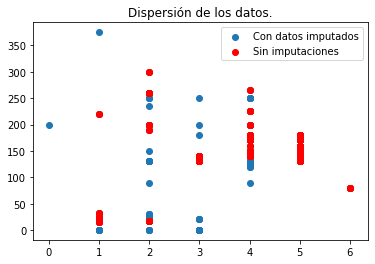

In [350]:
plt.scatter(df.Item_Size_Category, df['High Price'], label='Con datos imputados')
plt.title("Con imputacion en los datos.")
plt.scatter(x = 'Item_Size_Category', y = 'High Price', data = df_nas, color='r', label='Sin imputaciones')
plt.title("Dispersión de los datos.")
plt.legend()
plt.show()

# Proceso de regresión
En primer lugar, se intentará explicar la variación en High Price según la variación en Item Size, si no es posible, se buscaran otras variables significativas, ya sean sintéticas o no. 

In [769]:
vars_independientes = ['Item_Size_Category']
var_dependiente = ['High Price']

In [770]:
seed=161

df_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

df_nas_train, df_nas_test = train_test_split(df_nas, test_size=0.2, random_state=seed)

### Convierto los dataframes a arreglos numpy
Tengo dos dataframes, cada uno de ellos divididos en training y test set (80,20). La diferencia entre ambos, es que uno tiene los datos imputados, y el otro se le eliminaron las observaciones con valores nulos para Item Size.
### Sets con imputaciones

In [771]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

### Sets de observaciones con Item Size nulos eliminados

In [772]:
x_nas_train = np.array([df_nas_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_nas_train = np.array(df_nas_train[var_dependiente])

x_nas_test = np.array([df_nas_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_nas_test = np.array(df_nas_test[var_dependiente])

# Modelos con grado 1
### Modelo 1
Este primer modelo busca explicar la variación en el High Price, únicamente tomando en cuenta el Item Size.

In [773]:
tetas, X_train = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=20000, alpha=0.001)

#predicted_train = h_teta(X_train, tetas)

unos = np.ones(x_test.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.

X_test = np.vstack(
    (unos,
    x_test
    )
).T

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones


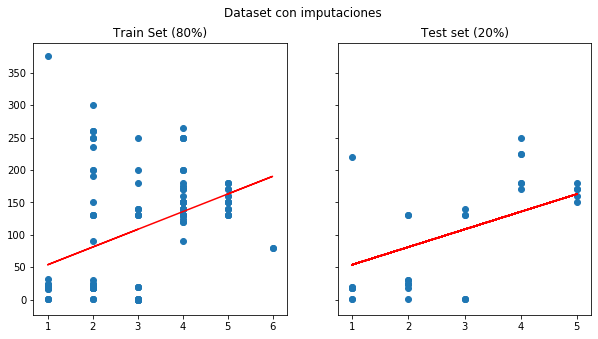

In [774]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset con imputaciones')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_train['Item_Size_Category'], pred_train, color = 'r')
axs[0].scatter(df_train['Item_Size_Category'], df_train['High Price'])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_test['Item_Size_Category'], pred_test, color = 'r')
axs[1].scatter(df_test['Item_Size_Category'], df_test['High Price'])
plt.show()

In [775]:
costo_train, costo_test

(3003.0158787050286, 512.7624305743584)

In [776]:
tetas_nas, X_nas_train = descenso_gradiente(x_nas_train, y_nas_train, h_teta, gradiente, max_iters=20000, alpha=0.001)

#predicted_train = h_teta(X_train, tetas)

unos = np.ones(x_nas_test.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.

X_nas_test = np.vstack(
    (unos,
    x_nas_test,
    #-x_set**2
    )
).T

costos_nas, predicciones_nas = cross_validate(X_nas_train, y_nas_train, X_nas_test, y_nas_test, tetas_nas)
costo_nas_train, costo_nas_test = costos_nas
pred_nas_train, pred_nas_test = predicciones_nas


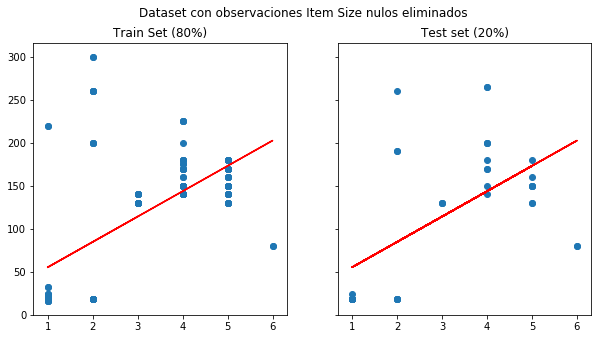

In [777]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset con observaciones Item Size nulos eliminados')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_nas_train['Item_Size_Category'], pred_nas_train, color = 'r')
axs[0].scatter(df_nas_train['Item_Size_Category'], df_nas_train['High Price'])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_nas_test['Item_Size_Category'], pred_nas_test, color = 'r')
axs[1].scatter(df_nas_test['Item_Size_Category'], df_nas_test['High Price'])
plt.show()

In [778]:
costo_nas_train, costo_nas_test

(1719.8433326773772, 507.82773251628464)

### Resultados primer modelo Grado 1

In [779]:
print("Los COSTOS son los siguientes:")
print("Para el dataset con imputaciones:")
print("\t - Train Set: {} \n\t - Test Set: {}".format(round(costo_train,2), round(costo_test,2)))
print("Para el dataset sin imputaciones:")
print("\t - Train Set: {} \n\t - Test Set: {}".format(round(costo_nas_train,2), round(costo_nas_test,2)))
print("Resultado: Las imputaciones no parece afectar el modelo.")

Los COSTOS son los siguientes:
Para el dataset con imputaciones:
	 - Train Set: 3003.02 
	 - Test Set: 512.76
Para el dataset sin imputaciones:
	 - Train Set: 1719.84 
	 - Test Set: 507.83
Resultado: Las imputaciones no parece afectar el modelo.


Debido a estos resultados entre el dataset con imputaciones, y el que no tiene, **se utilizará** únicamente el **dataset con imputaciones** para los siguientes modelos, ya que parece que el modelo con imputaciones permite generalizar de mejor manera.

### Modelo 2
Al ver que las tetas obtenidas no parecen reflejar mucho a los datos, obteniendo un costo relativamente alto, y una recta de regresión que tampoco refleja mucho los datos, se desarrollará otro modelo, observando otras features que estén correlacionadas con el precio.

In [662]:
df_analyze = df.copy()
#df_test_lwr70 = df.copy
#df_test_gtr70 = df.copy()

In [663]:
features_interes: List[str] = [
    'Package',
    'Variety',
    #'Sub Variety', # no es util para entender los datos debido a que es la misma sub variedad dada una variedad en especif.
    'High Price',
    'Unit of Sale', # ya no es util porque esta feature se deriva del feature package
    'Item Size'
]

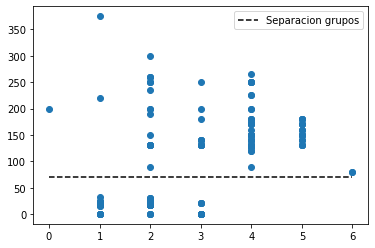

In [664]:
plt.scatter(df_analyze.Item_Size_Category, df_analyze["High Price"])
plt.hlines(y = 70, xmin = 0, xmax = 6, linestyles='--', label='Separacion grupos')
plt.legend()
plt.show()

In [665]:
df_analyze.loc[df_analyze['High Price']<70].groupby(['Package', 'Item Size'])[features_interes].mean()

High Price
Package              Item Size            
1 1/9 bushel cartons med             18.00
1 1/9 bushel crates  med             18.00
                     sml             18.00
1/2 bushel cartons   sml             19.00
24 inch bins         med-lge          0.26
35 lb cartons        med             26.33
36 inch bins         med              0.50
                     med-lge          0.30
                     sml              0.85
bushel cartons       med-lge         20.00
                     sml             32.00
each                 sml              0.55

In [666]:
df_analyze.loc[df_analyze['High Price']>70].groupby(['Package', 'Variety','Item Size'])[features_interes].mean()

High Price
Package      Variety           Item Size            
24 inch bins HOWDEN TYPE       lge            124.29
                               med            124.29
             PIE TYPE          lge            143.33
                               med            200.00
                               med-lge        151.00
36 inch bins CINDERELLA        med            250.00
             FAIRYTALE         med            250.00
             HOWDEN TYPE       lge            157.50
                               med            212.50
                               med-lge        153.33
                               sml            375.00
                               xlge           155.65
             HOWDEN WHITE TYPE med            250.00
             KNUCKLE HEAD      xlge           140.00
             PIE TYPE          lge            223.00
                               med            270.00
                               sml            220.00
bins         HOWDEN TYPE       med            150.00
each         BIG MACK TYPE     exjbo           80.00
                               lge            250.00

#### Observación
Se observó que existen dos grupos de precios, uno <70 y el otro >70. El primer approach será crear un modelo de regresión para cada uno de los grupos y luego promediar los coeficientes para generar el nuevo modelo.

In [667]:
df_grtr70 = df_analyze.loc[df_analyze['High Price']>70]
df_lwr70 = df_analyze.loc[df_analyze['High Price']<70]

In [668]:
df_grtr70_train, df_grtr70_test = train_test_split(df_grtr70, test_size=0.2)

df_lwr70_train, df_lwr70_test = train_test_split(df_lwr70, test_size=0.2)

#df_nas_train, df_nas_test = train_test_split(df_nas, test_size=0.2)

In [669]:
# arreglos x, y de Train y test sets para el grupo con precio mayor a 70
x_grtr70_train = np.array([df_grtr70_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_grtr70_train = np.array(df_grtr70_train[var_dependiente])

x_grtr70_test = np.array([df_grtr70_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_grtr70_test = np.array(df_grtr70_test[var_dependiente])

# arreglos x, y de Train y test sets para el grupo con precio mayor a 70
x_lwr70_train = np.array([df_lwr70_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_lwr70_train = np.array(df_lwr70_train[var_dependiente])

x_lwr70_test = np.array([df_lwr70_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_lwr70_test = np.array(df_lwr70_test[var_dependiente])

In [670]:
tetas_grtr70, X_train = descenso_gradiente(x_grtr70_train, y_grtr70_train, h_teta, gradiente, max_iters=20000, alpha=0.001)

#predicted_train = h_teta(X_train, tetas)

unos = np.ones(x_grtr70_test.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.

X_test = np.vstack(
    (unos,
    x_grtr70_test,
    #-x_set**2
    )
).T

costos_grtr70, predicciones_grtr70 = cross_validate(X_train, y_grtr70_train, X_test, y_grtr70_test, tetas_grtr70)
costo_grtr70_train, costo_grtr70_test = costos_grtr70
pred_grtr70_train, pred_grtr70_test = predicciones_grtr70


In [671]:
costos_grtr70

(1138.281596253617, 279.37861097060727)

In [652]:
costos_grtr70 # df nas

(620.530968485985, 429.6938387866553)

In [672]:
tetas_lwr70, X_train = descenso_gradiente(x_lwr70_train, y_lwr70_train, h_teta, gradiente, max_iters=20000, alpha=0.001)

#predicted_train = h_teta(X_train, tetas)

unos = np.ones(x_lwr70_test.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.

X_test = np.vstack(
    (unos,
    x_lwr70_test,
    #-x_set**2
    )
).T

costos_lwr70, predicciones_lwr70 = cross_validate(X_train, y_lwr70_train, X_test, y_lwr70_test, tetas_lwr70)
costo_lwr70_train, costo_lwr70_test = costos_lwr70
pred_lwr70_train, pred_lwr70_test = predicciones_lwr70

In [673]:
costos_lwr70

(40.90240364614201, 13.213173838574926)

In [654]:
costos_lwr70 # df nas

(4.8865795821434235, 0.5017212336980854)

In [674]:
print("Costos para cada grupo:")
print("\t - Para el grupo con precio < 70")
print("\t\t Train set: {}\n\t\t Test set: {}".format(costo_lwr70_train, costo_lwr70_test))
print("\t - Para el grupo con precio > 70")
print("\t\t Train set: {}\n\t\t Test set: {}".format(costo_grtr70_train, costo_grtr70_test))

Costos para cada grupo:
	 - Para el grupo con precio < 70
		 Train set: 40.90240364614201
		 Test set: 13.213173838574926
	 - Para el grupo con precio > 70
		 Train set: 1138.281596253617
		 Test set: 279.37861097060727


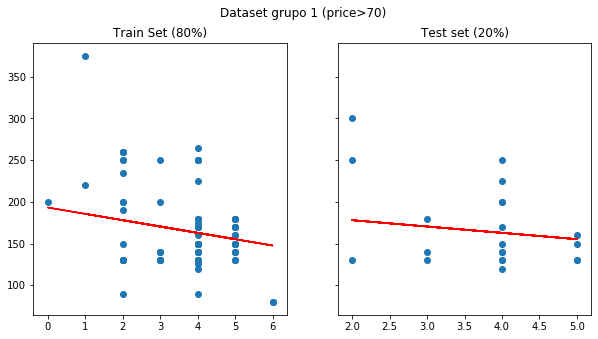

In [675]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)

fig.suptitle('Dataset grupo 1 (price>70)')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_grtr70_train['Item_Size_Category'], pred_grtr70_train, color = 'r')
axs[0].scatter(df_grtr70_train['Item_Size_Category'], df_grtr70_train['High Price'])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_grtr70_test['Item_Size_Category'], pred_grtr70_test, color = 'r')
axs[1].scatter(df_grtr70_test['Item_Size_Category'], df_grtr70_test['High Price'])
plt.show()

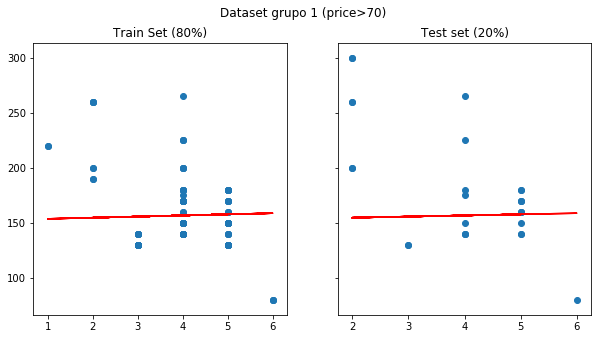

In [656]:
# ----------------- Df nas --------------------------------------
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)

fig.suptitle('Dataset grupo 1 (price>70)')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_grtr70_train['Item_Size_Category'], pred_grtr70_train, color = 'r')
axs[0].scatter(df_grtr70_train['Item_Size_Category'], df_grtr70_train['High Price'])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_grtr70_test['Item_Size_Category'], pred_grtr70_test, color = 'r')
axs[1].scatter(df_grtr70_test['Item_Size_Category'], df_grtr70_test['High Price'])
plt.show()

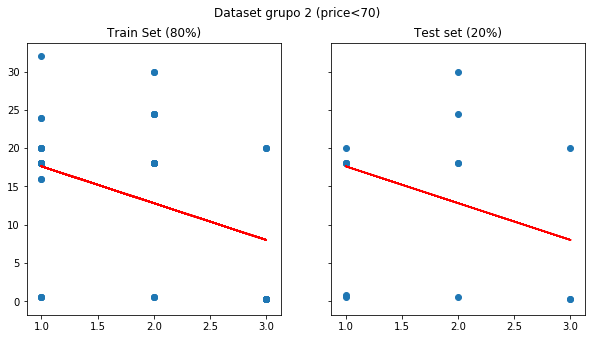

In [676]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)

fig.suptitle('Dataset grupo 2 (price<70)')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_lwr70_train['Item_Size_Category'], pred_lwr70_train, color = 'r')
axs[0].scatter(df_lwr70_train['Item_Size_Category'], df_lwr70_train['High Price'])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_lwr70_test['Item_Size_Category'], pred_lwr70_test, color = 'r')
axs[1].scatter(df_lwr70_test['Item_Size_Category'], df_lwr70_test['High Price'])
plt.show()

### Promedio de tetas de ambos grupos para generar modelo unificado

In [677]:
unos = np.ones(x_train.shape[1])
X_train = np.vstack(
    (
        unos,
        x_train,
        #-x_train**2
    #-x_set**2
    )
).T

#predicted_train = h_teta(X_train, tetas)

unos = np.ones(x_test.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.

X_test = np.vstack(
    (
        unos,
        x_test,
        #-x_test**2
    #-x_set**2
    )
).T

#tetas_avg = np.array([(tetas_lwr70[0] + tetas_grtr70[0]) / 2, max([tetas_lwr70[1],tetas_grtr70[1]])])

#tetas_avg = np.array([max([tetas_lwr70[0],tetas_grtr70[0]]), max([tetas_lwr70[1],tetas_grtr70[1]])])
tetas_avg = (tetas_lwr70 + tetas_grtr70)/ tetas_lwr70.shape[0]
tetas_avg

costos_avg, predicciones_avg = cross_validate(X_train, y_train, X_test, y_test, tetas_avg)
costo_avg_train, costo_avg_test = costos_avg
pred_avg_train, pred_avg_test = predicciones_avg

In [678]:
costos_avg

(4181.73225308733, 1023.4548392024476)

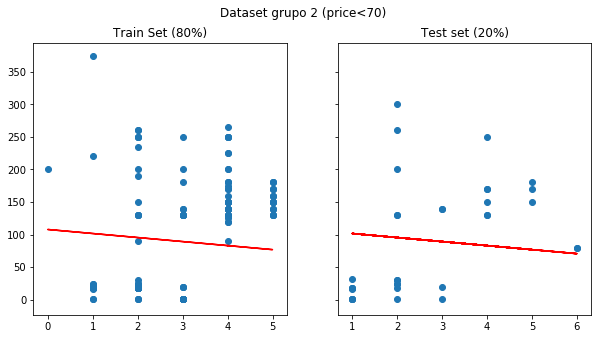

In [679]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)

fig.suptitle('Dataset grupo 2 (price<70)')

axs[0].set_title('Train Set (80%)')
axs[0].plot(x_train.T, pred_avg_train, color = 'r')
axs[0].scatter(x_train.T, y_train)

axs[1].set_title('Test set (20%)')
axs[1].plot(x_test.T, pred_avg_test, color = 'r')
axs[1].scatter(x_test.T, y_test)
plt.show()

### Resultados Modelo 2 de grado 1
Separando los grupos en dos, y calculando sus tetas, mejora significativamente los resultados para cada grupo. Sin embargo, al promediar los coeficientes, para unificar el modelo, el resultado es peor que el del modelo 1 realizado previamente. 

### Modelo 3
Se crearán variables dummies para la feature Variety, ya que en las visualizaciones anteriores se observó que para cada variedad, independientemente del Item Size, el precio era lo que variaba ante una variación en esta feature. Relacionándolo también con Item Size.

In [780]:
vars_independientes = ['Item_Size_Category']

# agrego nuevas variables independientes al modelo, utilizando cada tipo de variedad, mutuamente excluyente.
for dummy_feature in pd.get_dummies(df.Variety).columns:
    vars_independientes.append(dummy_feature)

var_dependiente = ['High Price']

In [781]:
vars_independientes # ahora ya tienen las vars dummies incluidas

['Item_Size_Category',
 'BIG MACK TYPE',
 'CINDERELLA',
 'FAIRYTALE',
 'HOWDEN TYPE',
 'HOWDEN WHITE TYPE',
 'KNUCKLE HEAD',
 'MINIATURE',
 'MIXED HEIRLOOM VARIETIES',
 'PIE TYPE']

In [782]:
pd.get_dummies(df.Variety)

,BIG MACK TYPE,CINDERELLA,FAIRYTALE,HOWDEN TYPE,HOWDEN WHITE TYPE,KNUCKLE HEAD,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
107,0,0,0,0,0,0,1,0,0
108,0,0,0,0,0,0,1,0,0
109,0,0,0,0,0,0,1,0,0
110,0,0,0,0,0,0,1,0,0


In [758]:
df[pd.get_dummies(df.Variety).columns] = pd.get_dummies(df.Variety)

In [783]:
df.head()

,Commodity Name,City Name,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack,Item_Size_Category,BIG MACK TYPE,CINDERELLA,FAIRYTALE,HOWDEN TYPE,HOWDEN WHITE TYPE,KNUCKLE HEAD,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE,1 1/9 bushel cartons,1 1/9 bushel crates,1/2 bushel cartons,24 inch bins,35 lb cartons,36 inch bins,bins,bushel cartons,each
0,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,09/24/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,PER BIN,N,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,10/01/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,med,NaN,PER BIN,N,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,NaN,10/08/2016,120.0,130.0,120.0,130.0,CALIFORNIA,NaN,lge,NaN,PER BIN,N,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [784]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

In [785]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [786]:
tetas, X_train = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=20000, alpha=0.001)

#predicted_train = h_teta(X_train, tetas)

unos = np.ones(x_test.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.

X_test = np.vstack(
    (unos,
    x_test,
    #-x_test**2
    )
).T

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones


In [787]:
costos

(2343.826942693254, 356.6127842474491)

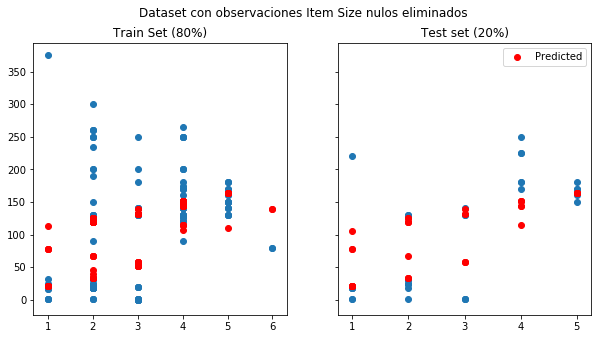

In [788]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset con observaciones Item Size nulos eliminados')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train['Item_Size_Category'], df_train['High Price'])
axs[0].scatter(df_train['Item_Size_Category'], pred_train, color = 'r')

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test['Item_Size_Category'], df_test['High Price'])
axs[1].scatter(df_test['Item_Size_Category'], pred_test, color = 'r', label='Predicted')
plt.legend()
plt.show()

### Resultados modelo 3
Hasta el momento, es el modelo con menor error. Es una regresión lineal múltiple, utilizando Item Size, y las variables categóricas.

In [789]:
print("Los COSTOS son los siguientes:")
print("Para el dataset con cross validation:")
print("\t - Train Set: {} \n\t - Test Set: {}".format(round(costo_train,2), round(costo_test,2)))

Los COSTOS son los siguientes:
Para el dataset con cross validation:
	 - Train Set: 2343.83 
	 - Test Set: 356.61
Resultado: Las imputaciones no parecen haber mejorado el modelo.


### Modelo 4 
Este modelo buscará reducir el error utilizando las features del modelo 3, y adicionalmente, la feature de Package, la cual también es mutuamente excluyente.

In [790]:
for dummy_feature in pd.get_dummies(df.Package).columns: # se agregaron las features de Package al set de vars indep.
    vars_independientes.append(dummy_feature)

In [791]:
vars_independientes # ahora ya tienen las vars dummies incluidas

['Item_Size_Category',
 'BIG MACK TYPE',
 'CINDERELLA',
 'FAIRYTALE',
 'HOWDEN TYPE',
 'HOWDEN WHITE TYPE',
 'KNUCKLE HEAD',
 'MINIATURE',
 'MIXED HEIRLOOM VARIETIES',
 'PIE TYPE',
 '1 1/9 bushel cartons',
 '1 1/9 bushel crates',
 '1/2 bushel cartons',
 '24 inch bins',
 '35 lb cartons',
 '36 inch bins',
 'bins',
 'bushel cartons',
 'each']

In [792]:
df[pd.get_dummies(df.Package).columns] = pd.get_dummies(df.Package)

In [793]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

In [794]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [795]:
tetas, X_train = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=20000, alpha=0.001)

#predicted_train = h_teta(X_train, tetas)

unos = np.ones(x_test.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.

X_test = np.vstack(
    (unos,
    x_test,
    #-x_test**2
    )
).T

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

In [796]:
costos

(1618.5180473201708, 298.4034703064229)

In [797]:
print("Los COSTOS son los siguientes:")
print("Para el dataset con cross validation:")
print("\t - Train Set: {} \n\t - Test Set: {}".format(round(costo_train,2), round(costo_test,2)))

Los COSTOS son los siguientes:
Para el dataset con cross validation:
	 - Train Set: 1618.52 
	 - Test Set: 298.4


### Resultados modelo 4 
El modelo 4 presenta un menor costo respecto a los modelos previos, y agregar la feature de Package, mejora el modelo.

In [804]:
print("El modelo 4, respecto al modelo 3, presenta una mejora del {}% respecto al costo del modelo 3".format(round((356.61 - costo_test) / 356.61, 2)*100))

El modelo 4, respecto al modelo 3, presenta una mejora del 16.0% respecto al costo del modelo 3


# Modelos de grado 2
A continuación se desarrollarán los modelos de grado 2 para determinar si describen de mejor manera la variación en High Price.

In [822]:
vars_independientes = ['Item_Size_Category']
var_dependiente = ['High Price']

In [823]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

In [824]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])


## Modelo 1
Este modelo utiliza únicamente las features de Item Size.

In [844]:
tetas, X_train = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=20000, alpha=0.001, grado=2)

#predicted_train = h_teta(X_train, tetas)

unos = np.ones(x_test.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.

X_test = np.vstack(
    (
    unos,
    x_test,
    x_test**2,
    )
).T

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

In [845]:
costos

(2950.2543557459676, 532.5552311509161)

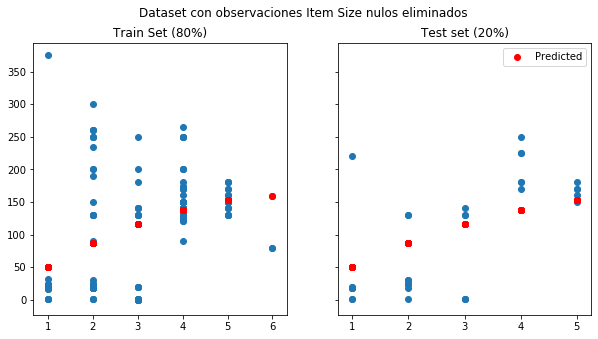

In [846]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset con observaciones Item Size nulos eliminados')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train['Item_Size_Category'], df_train['High Price'])
axs[0].scatter(df_train['Item_Size_Category'], pred_train, color = 'r')

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test['Item_Size_Category'], df_test['High Price'])
axs[1].scatter(df_test['Item_Size_Category'], pred_test, color = 'r', label='Predicted')
plt.legend()
plt.show()


### Resultados modelo 1
A pesar de aumentar la complejidad utilizando una sola feature, el costo es mayor que el modelo 4 de Grado 1.